<a href="https://colab.research.google.com/github/ShashenWijesinghe/ML/blob/main/InsurancePlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None, 'display.max_columns', None)
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
from sklearn import preprocessing

In [5]:
dataset=pd.read_csv('https://github.com/ShashenWijesinghe/ML/blob/593a00e99393bce140db2560f2c7929588ec558b/insurance.csv?raw=true')
dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
scaler = MinMaxScaler()
dataset['age'] = scaler.fit_transform(dataset['age'].values.reshape(-1,1))

In [9]:
dataset.loc[dataset["bmi"] < 18.5, "bmi"] = 0
dataset.loc[(dataset["bmi"] > 18.5) & (dataset["bmi"] <= 24.9) , "bmi"] = 1
dataset.loc[(dataset["bmi"] > 25) & (dataset["bmi"] <= 29.9) , "bmi"] = 2
dataset.loc[dataset["bmi"] > 30 , "bmi"] = 3

In [10]:
dataset['charges'].max()

63770.42801

In [11]:
def label_charge (row):
   if row['charges'] <= 5000 :
      return 'PKG1'
   if row['charges'] > 5000 and row['charges'] <= 10000 :
      return 'PKG2'
   if row['charges'] > 10000 and row['charges'] <= 15000 :
      return 'PKG3'
   if row['charges'] > 15000 :
      return 'PKG4'
   return 'UNKNOWN'

In [12]:
dataset['PLAN'] = dataset.apply (lambda row: label_charge(row), axis=1)

In [13]:
dataset.tail(10)

,age,sex,bmi,children,smoker,region,charges,PLAN
1328,0.108696,female,1.0,2,no,northeast,22395.74424,PKG4
1329,0.739130,male,3.0,2,no,southwest,10325.20600,PKG3
1330,0.847826,female,2.0,2,no,southeast,12629.16560,PKG3
1331,0.108696,female,3.0,0,no,southwest,10795.93733,PKG3
1332,0.739130,female,3.0,3,no,southwest,11411.68500,PKG3
1333,0.695652,male,3.0,3,no,northwest,10600.54830,PKG3
1334,0.000000,female,3.0,0,no,northeast,2205.98080,PKG1
1335,0.000000,female,3.0,0,no,southeast,1629.83350,PKG1
1336,0.065217,female,2.0,0,no,southwest,2007.94500,PKG1
1337,0.934783,female,2.0,0,yes,northwest,29141.36030,PKG4


In [14]:
dataset['PLAN'].value_counts()

PKG1    359
PKG4    358
PKG2    353
PKG3    268
Name: PLAN, dtype: int64

In [15]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
PLAN        0
dtype: int64

,age,bmi,children,charges
age,1.000000,0.032012,0.042469,0.299008
bmi,0.032012,1.000000,-0.009511,0.029578
children,0.042469,-0.009511,1.000000,0.067998
charges,0.299008,0.029578,0.067998,1.000000


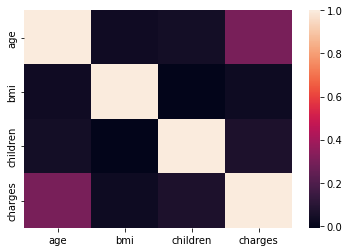

In [16]:
correlation_matrix = dataset[['age', 'sex', 'bmi', 'children', 'smoker','region','charges','PLAN']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

In [17]:
labelencoder = LabelEncoder()
dataset['sex'] = labelencoder.fit_transform(dataset['sex'].astype(str))
dataset['smoker'] = labelencoder.fit_transform(dataset['smoker'].astype(str))
dataset['region'] = labelencoder.fit_transform(dataset['region'].astype(str))
dataset['PLAN'] = labelencoder.fit_transform(dataset['PLAN'].astype(str))

In [18]:
X=dataset[['age','sex','children','smoker','region']]
y=dataset['PLAN']

In [19]:
X1_train, X1_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN


Algorithm- Logistic Regression

In [24]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X1_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
model.classes_

array([0, 1, 2, 3])

In [26]:
model.coef_

array([[-7.02530054e+00,  3.16251295e-01, -3.63339314e-01,
        -2.84121348e+00,  1.28407672e-01],
       [ 3.88756899e-01,  2.79707638e-02,  1.79809860e-01,
        -1.74511731e+00,  6.51492060e-02],
       [ 5.10059589e+00, -3.43849147e-01,  3.59851295e-02,
         2.45391230e-01, -1.04975392e-01],
       [ 1.53594775e+00, -3.72911060e-04,  1.47544324e-01,
         4.34093956e+00, -8.85814860e-02]])

In [27]:
model.intercept_

array([ 3.16593386,  0.36076286, -2.32489565, -1.20180107])

In [28]:
model.predict_proba(X1_test)[:5]

array([[3.16669417e-02, 4.40596725e-01, 3.57976253e-01, 1.69760080e-01],
       [3.70401845e-01, 3.82723168e-01, 1.39113744e-01, 1.07761243e-01],
       [1.19535434e-05, 3.37028268e-03, 1.57836713e-01, 8.38781051e-01],
       [2.77098367e-02, 5.48632883e-01, 2.48744983e-01, 1.74912297e-01],
       [7.70187792e-02, 1.15260607e-02, 3.70597882e-03, 9.07749181e-01]])

In [29]:
model.predict(X1_test)[:5]

array([1, 1, 3, 1, 3])

In [30]:
y_pred_prob_0 = model.predict_proba(X1_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X1_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X1_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X1_test)[:, 3]

# class 0 probability
y_pred_prob_0

array([3.16669417e-02, 3.70401845e-01, 1.19535434e-05, 2.77098367e-02,
       7.70187792e-02, 4.72607341e-01, 9.23135030e-01, 2.36945934e-03,
       6.93338163e-01, 1.56401409e-02, 3.56252501e-03, 1.08191945e-01,
       5.82602905e-01, 1.44978580e-04, 4.64354911e-05, 1.99748733e-04,
       1.92240182e-02, 2.38935108e-04, 5.53513784e-02, 6.79752385e-04,
       3.30100954e-01, 9.64761759e-02, 9.51250186e-01, 8.66698076e-01,
       8.37326055e-03, 1.16449494e-02, 5.18993865e-03, 3.84022513e-01,
       2.12152041e-02, 9.54855582e-01, 4.41785704e-02, 7.08076650e-03,
       9.03738860e-01, 2.70207902e-01, 7.79419517e-01, 1.16905773e-01,
       8.57857190e-01, 1.08441892e-01, 7.44187593e-05, 2.60450863e-03,
       4.97320933e-01, 8.52563307e-01, 8.21288597e-03, 7.61839204e-03,
       3.63043491e-01, 6.97581959e-03, 7.47117987e-01, 5.14297799e-01,
       2.54393776e-04, 4.46292293e-01, 2.08911368e-03, 9.25282291e-01,
       1.42507986e-01, 9.46328662e-01, 1.77743086e-02, 1.78322051e-02,
      

In [31]:
y_pred = model.predict(X1_test)
y_pred

array([1, 1, 3, 1, 3, 0, 0, 2, 0, 1, 3, 1, 0, 3, 3, 3, 1, 3, 1, 3, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 3, 3, 0, 0, 2, 2,
       1, 2, 0, 0, 3, 0, 2, 0, 1, 0, 2, 1, 0, 3, 2, 2, 2, 1, 2, 1, 2, 0,
       3, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 1, 3, 3, 3, 1, 2,
       1, 1, 2, 3, 3, 1, 3, 1, 3, 0, 3, 1, 0, 0, 1, 1, 2, 0, 1, 3, 0, 3,
       0, 0, 2, 3, 2, 0, 2, 3, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 2, 0, 3, 3, 3, 1, 2, 0, 2, 0, 3, 1, 0, 2, 0, 3, 0, 0, 3,
       1, 0, 2, 1, 3, 3, 2, 0, 2, 0, 0, 1, 3, 3, 3, 0, 1, 1, 1, 0, 0, 3,
       3, 2, 3, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 3, 2, 2, 0, 2,
       0, 2, 0, 3, 0, 0, 3, 3, 2, 0, 1, 0, 2, 2, 1, 3, 1, 0, 1, 2, 2, 1,
       0, 1, 1, 3, 0, 3, 0, 0, 1, 1, 0, 2, 0, 3, 2, 1, 0, 1, 3, 0, 2, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 3, 3,
       2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 0, 3, 1, 3, 1, 1, 2, 2, 1, 2, 3, 0,
       2, 3, 0, 0, 0, 2, 3, 1, 1, 2, 1, 0, 0, 3, 3,

In [32]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2,'y_pred_prob_3':y_pred_prob_3})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3
1314,3,3,0.001687,0.010115,0.009454,0.978744
65,0,0,0.935084,0.054974,0.002492,0.007449
1175,0,0,0.896743,0.085501,0.005271,0.012485
976,1,1,0.088841,0.446810,0.322901,0.141448
1197,1,1,0.275146,0.447806,0.157993,0.119055
605,1,2,0.032041,0.348664,0.496922,0.122372
1010,1,1,0.068369,0.430623,0.380749,0.120259
156,3,3,0.000457,0.006871,0.036342,0.956331
1034,2,2,0.004806,0.209295,0.679043,0.106856
636,0,0,0.875901,0.100600,0.005551,0.017949


In [33]:
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_0,y_pred_1,y_pred_2,y_pred_3
764,1,1,0.031667,0.440597,0.357976,0.169760,0,1,0,0
887,1,1,0.370402,0.382723,0.139114,0.107761,0,1,0,0
890,3,3,0.000012,0.003370,0.157837,0.838781,0,0,0,1
1293,1,1,0.027710,0.548633,0.248745,0.174912,0,1,0,0
259,3,3,0.077019,0.011526,0.003706,0.907749,0,0,0,1


In [36]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,All
y_act,,,,,
0,109,4,0,0,113
1,1,91,19,0,111
2,3,11,61,1,76
3,8,7,9,78,102
All,121,113,89,79,402


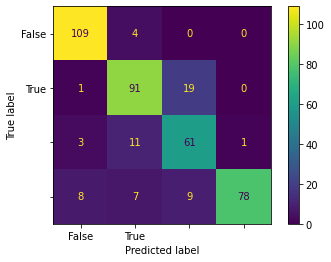

In [37]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_result['y_act'], test_result['y_pred'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] + cfm.loc[2,2]+ cfm.loc[3,3]) / cfm.loc['All','All'] 
acuracy

0.8432835820895522

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       113
           1       0.82      0.86      0.84       111
           2       0.75      0.84      0.80        76
           3       0.93      0.76      0.84       102

    accuracy                           0.85       402
   macro avg       0.85      0.85      0.85       402
weighted avg       0.86      0.85      0.85       402



2)Support Vector Machines

In [38]:

model_SVC=svm.SVC()
model_SVC.fit(X1_train,y_train)

SVC()

In [39]:
y_pred=model_SVC.predict(X1_test)

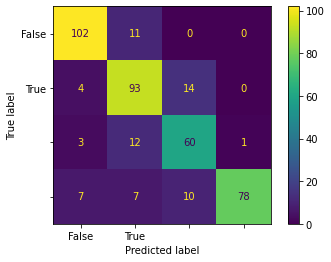

In [40]:
confusion_matrix_SVC = metrics.confusion_matrix(y_test,y_pred)

cm_display_SVC = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_SVC, display_labels = [False, True])

cm_display_SVC.plot()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8283582089552238


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       113
           1       0.76      0.84      0.79       111
           2       0.71      0.79      0.75        76
           3       0.99      0.76      0.86       102

    accuracy                           0.83       402
   macro avg       0.83      0.82      0.82       402
weighted avg       0.84      0.83      0.83       402



Algorithm- Neural Network

In [50]:
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Activation,Dropout

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(5,)),
  tf.keras.layers.Dense(128, activation='elu'),
  tf.keras.layers.Dense(8)
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 5)                 0         
                                                                 
 dense_4 (Dense)             (None, 128)               768       
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 1,800
Trainable params: 1,800
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [52]:
# Fit model
hist = model.fit(X1_train, y_train,
                batch_size=128,
                epochs=50,
                verbose=1,
                validation_data=(X1_test, y_test))

Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 1.4312 - sparse_categorical_accuracy: 0.4380 - val_loss: 1.0499 - val_sparse_categorical_accuracy: 0.6667
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.9719 - sparse_categorical_accuracy: 0.6688 - val_loss: 0.8442 - val_sparse_categorical_accuracy: 0.7139
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8227 - sparse_categorical_accuracy: 0.7158 - val_loss: 0.7405 - val_sparse_categorical_accuracy: 0.7562
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7441 - sparse_categorical_accuracy: 0.7479 - val_loss: 0.6878 - val_sparse_categorical_accuracy: 0.7736
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.7027 - sparse_categorical_accuracy: 0.7853 - val_loss: 0.6656 - val_sparse_categorical_accuracy: 0.7861
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6705 - sparse_categorical_accuracy: 0.8045 - va

In [53]:
yhat = model.predict(X1_test)
y_predict = np.argmax(yhat,axis=1)
print (classification_report(y_test, y_predict))


13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       113
           1       0.81      0.80      0.81       111
           2       0.69      0.93      0.79        76
           3       0.99      0.76      0.86       102

    accuracy                           0.84       402
   macro avg       0.85      0.85      0.84       402
weighted avg       0.86      0.84      0.84       402



In [ ]:
acuracy_NN= metrics.accuracy_score(y_test, y_predict) 
acuracy_NN

0.8258706467661692

Algorithm- Decision Tree Classifer

In [63]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X1_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [64]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X1_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X1_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X1_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X1_test)[:, 3]

# Prediction
y_pred = model.predict(X1_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2, 'y_pred_prob_3':y_pred_prob_3})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_0,y_pred_1,y_pred_2,y_pred_3
764,1,1,0.0,1.0,0.0,0.0,0,1,0,0
887,1,1,0.0,1.0,0.0,0.0,0,1,0,0
890,3,3,0.0,0.0,0.0,1.0,0,0,0,1
1293,1,1,0.0,1.0,0.0,0.0,0,1,0,0
259,3,3,0.0,0.0,0.0,1.0,0,0,0,1


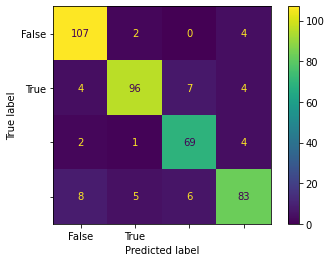

In [67]:
confusion_matrix_DT = metrics.confusion_matrix(y_test,y_pred)

cm_display_DT = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_DT, display_labels = [False, True])

cm_display_DT.plot()
plt.show()

In [69]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,All
y_act,,,,,
0,107,2,0,4,113
1,4,96,7,4,111
2,2,1,69,4,76
3,8,5,6,83,102
All,121,104,82,95,402


In [66]:
from sklearn import metrics
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.8830845771144279

In [ ]:
f1_score_decision_tree = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_decision_tree

0.8825782267446578

In [70]:
print (classification_report(test_result['y_act'], test_result['y_pred']))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       113
           1       0.92      0.86      0.89       111
           2       0.84      0.91      0.87        76
           3       0.87      0.81      0.84       102

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402

